In [149]:
#Load in data
import pandas as pd
data = pd.read_csv('data/ClassData.csv')
data.head()

,Glycohemoglobin (%) (AIC),Smoked at least 100 cigarettes,BMI,Weight (kg),Waist Circumference (cm),Arm Circumference (cm),Hip Circumference (cm),# of meals not home prepared,Total Cholesterol (mg/dL),Has diabetes,...,Other Hispanic,Black,Asian,Other,Marital Status: Together,Marital Status: Separated,Highest Education: Some High School,Highest Education: High School,Highest Education: Some College,Highest Education: College
0,5.7,0,30.2,103.7,109.6,32.0,107.8,0,105.0,1,...,0,0,0,1,0,0,0,0,1,0
1,6.4,0,30.5,86.0,108.3,29.0,106.4,2,172.0,1,...,1,0,0,0,0,1,0,1,0,0
2,5.4,0,29.6,62.0,84.8,29.8,106.7,3,200.0,0,...,0,0,1,0,1,0,0,0,0,1
3,5.3,1,24.6,67.9,87.0,31.0,93.4,0,161.0,0,...,0,0,1,0,1,0,0,0,0,0
4,5.9,0,25.2,75.2,95.0,32.0,96.4,6,224.0,0,...,0,0,0,0,1,0,0,0,1,0


In [150]:
# Split data
X = data.drop(columns = 'Has diabetes')
y = data['Has diabetes']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

import numpy as np
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Determine Optimal k

Text(0.5, 1.0, 'CV Error Rates for Selecting K')

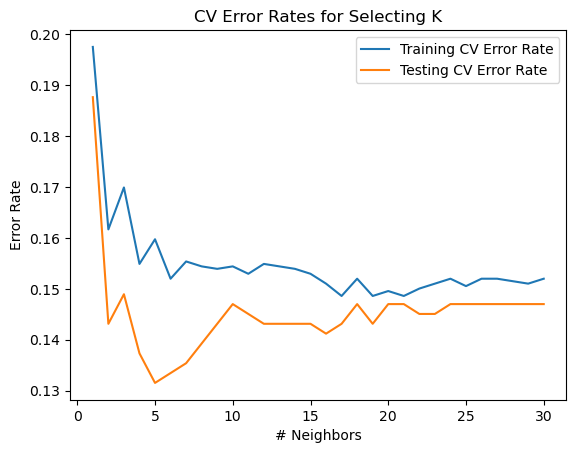

In [151]:
# 10-Fold CV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

kf = KFold(n_splits = 10)
fold1, fold2, fold3, fold4, fold5, fold6, fold7, fold8, fold9, fold10 = kf.split(X_train)
folds = [fold1, fold2, fold3, fold4, fold5, fold6, fold7, fold8, fold9, fold10]

CV_err_rates_k = []
for k in range(1, 31):
    incorrect = []
    
    for fold in folds:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train[fold[0]], y_train[fold[0]])
        preds = knn.predict(X_train[fold[1]])
        
        for i in range(0, len(preds)):
            if preds[i] != y_train[fold[1]][i]:
                incorrect.append(1)
            else:
                incorrect.append(0)
                
    CV_err_rates_k.append(sum(incorrect)/len(incorrect))
            
train_CV_err_rates = CV_err_rates_k


fold1, fold2, fold3, fold4, fold5, fold6, fold7, fold8, fold9, fold10 = kf.split(X_test)
folds = [fold1, fold2, fold3, fold4, fold5, fold6, fold7, fold8, fold9, fold10]

CV_err_rates_k = []
for k in range(1, 31):
    incorrect = []
    
    for fold in folds:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_test[fold[0]], y_test[fold[0]])
        preds = knn.predict(X_test[fold[1]])
        
        for i in range(0, len(preds)):
            if preds[i] != y_test[fold[1]][i]:
                incorrect.append(1)
            else:
                incorrect.append(0)
                
    CV_err_rates_k.append(sum(incorrect)/len(incorrect))
            
test_CV_err_rates = CV_err_rates_k


plt.plot(range(1, 31), train_CV_err_rates, label = 'Training CV Error Rate')
plt.plot(range(1, 31), test_CV_err_rates, label = 'Testing CV Error Rate')
plt.legend()
plt.xlabel('# Neighbors')
plt.ylabel('Error Rate')
plt.title('CV Error Rates for Selecting K')

In [157]:
print(min(train_CV_err_rates))
print(min(test_CV_err_rates))

0.14859632139399806
0.13152804642166344


k = 17, 19, 21 are tied for the lowest training error rate at 0.1486.<br/>
k = 5 has the lowest test error rate at 0.1315.

## Determine Optimal Predictors

In [152]:
# Forward Stepwise Selection
missing_vars = list(range(0, X_train.shape[1]))

kf = KFold(n_splits = 5) # 10 took too long
fold1, fold2, fold3, fold4, fold5 = kf.split(X_train) 
folds = [fold1, fold2, fold3, fold4, fold5]

CV_err_rates = []
selected = []
models = []
num_missing_vars = len(missing_vars)
while num_missing_vars > 0:
    
    model_err_rates = []
    for i in missing_vars:
        predictors = selected[:]
        predictors.append(i)
        
        incorrect = []
        for fold in folds:
            knn = KNeighborsClassifier(n_neighbors = 5)
            knn.fit(X_train[fold[0]][:, predictors].reshape(-1, len(predictors)), y_train[fold[0]])
            preds = knn.predict(X_train[fold[1]][:, predictors])
            
            for i2 in range(0, len(preds)):
                if preds[i2] != y_train[fold[1]][i2]:
                    incorrect.append(1)
                else:
                    incorrect.append(0)
        
        model_err_rates.append(sum(incorrect)/len(incorrect))
    
    lowest_err_rate = min(model_err_rates)
    best_missing_var_index = model_err_rates.index(lowest_err_rate)
    
    CV_err_rates.append(lowest_err_rate)
    selected.append(missing_vars[best_missing_var_index])
    models.append(selected[:])
    
    missing_vars.pop(best_missing_var_index)
    num_missing_vars = len(missing_vars)
    

In [171]:
print("Best training model used variables")
print(np.array(data.columns[models[CV_err_rates.index(min(CV_err_rates))]]))      
print('and had a CV training error rate of ', min(CV_err_rates), '.', sep='')

Best training model used variables
['Glycohemoglobin (%)  (AIC)' 'Doctor ever said you were overweight'
 'Gender' 'Drank 3-6 per Year' 'Walk or bicycle'
 'Ever told you had any liver condition' 'Poor health condition'
 'Poor diet health' 'Has job and worked' 'Fair health condition'
 'Several Days Depressed' 'More than Half Days Bad Diet']
and had a CV training error rate of 0.06727976766698936.


In [154]:
# Acquire test CV error rates
kf = KFold(n_splits = 5)
fold1, fold2, fold3, fold4, fold5 = kf.split(X_test)
folds = [fold1, fold2, fold3, fold4, fold5]

CV_test_errs = []
for model in models:
    
    incorrect = []
    for fold in folds:
        knn = KNeighborsClassifier(n_neighbors = 5)
        knn.fit(X_test[np.ix_(fold[0], model)], y_test[fold[0]])
        preds = knn.predict(X_test[np.ix_(fold[1], model)])
        
        for i in range(0, len(preds)):
            if preds[i] != y_test[fold[1]][i]:
                incorrect.append(1)
            else:
                incorrect.append(0)
    CV_test_errs.append(sum(incorrect)/len(incorrect))

Text(0.5, 1.0, 'CV Error Rates for Determining Predictors')

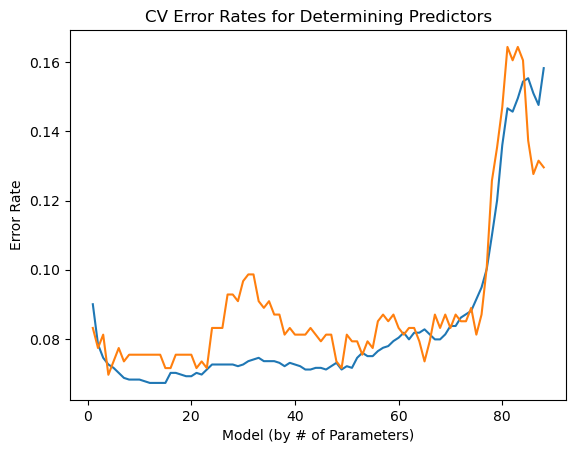

In [155]:
plt.plot(range(1, data.shape[1]), CV_err_rates, label = 'CV Training Error Rate')
plt.plot(range(1, data.shape[1]), CV_test_errs, label = 'CV Testing Error Rate')
plt.xlabel('Model (by # of Parameters)')
plt.ylabel('Error Rate')
plt.title('CV Error Rates for Determining Predictors')

In [172]:
print("Best testing model used the variables")
print(np.array(data.columns[models[CV_test_errs.index(min(CV_test_errs))]]))
print('and had a CV test error rate of ', min(CV_test_errs), '.', sep='')

Best testing model used the variables
['Glycohemoglobin (%)  (AIC)' 'Doctor ever said you were overweight'
 'Gender' 'Drank 3-6 per Year']
and had a CV test error rate of 0.06963249516441006.


In [176]:
models[3]

[0, 19, 40, 76]

## Best KNN for Classifying Diabetes

Best KNN should use K = 5 with variable 0 "Glycohemoglobin (%)  (AIC)", variable 19 "Docter ever said you were overweight", variable 40 "Gender", and variable 76 "Drank 3-6 times per Year" as predictors.

In [181]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train[:, [0, 19, 40, 76]], y_train)
train_preds = knn.predict(X_train[:, [0, 19, 40, 76]])
test_preds = knn.predict(X_test[:, [0, 19, 40, 76]])

train_incorrect = []
for i in range(0, len(train_preds)):
    if train_preds[i] != y_train[i]:
        train_incorrect.append(1)
    else:
        train_incorrect.append(0)

test_incorrect = []
for i in range(0, len(test_preds)):
    if test_preds[i] != y_test[i]:
        test_incorrect.append(1)
    else:
        test_incorrect.append(0)

print('Final Training Error Rate:', sum(train_incorrect)/len(train_incorrect))
print('Final Testing Error Rate:', sum(test_incorrect)/len(test_incorrect))

Final Training Error Rate: 0.0696999031945789
Final Testing Error Rate: 0.07736943907156674
